In [1]:
from PIL import Image, ImageDraw, ImageFont
import glob
import random
from typing import TypeVar, Union
import yaml
from yaml import load, dump, Loader, Dumper

In [2]:
workdir  = "."
# 画像候補リスト作成
bgs = glob.glob("{}/material/bgs/*".format(workdir))
chars = glob.glob("{}/material/chars/*".format(workdir))
logos = glob.glob("{}/material/logo/*".format(workdir))

In [3]:
with open("config.yml") as file:
    yml = yaml.load(file, Loader=yaml.Loader)

In [4]:
class Material:
    def __init__(self):
        pass
    

class BaseImg(Material):
    def __init__(self, img):
        self.img : PIL.Image.Image = img
        #self.img.putalpha(255)
        
    def resize_img(self, shape:Union[tuple[int], int]=(1280,720)) -> None:
        # 引数がtupleの場合はそのサイズ、intの場合はwidthとして元比率を維持する。
        if isinstance(shape, int):
            shape = (shape, int(shape*self.img.height/self.img.width))      
        self.img = self.img.resize(shape, Image.LANCZOS)
            
        print("{} -> resized {}".format(type(shape), self.img.size))
        
    def get_img_size(self, ratio=1) -> tuple[int]:
        return (int(self.img.width*ratio), int(self.img.height*ratio))

    def composit(self, target) -> None:
        assert target.img.mode == "RGBA"
        self.img.putalpha(255)
        self.img= Image.alpha_composite(self.img, target.img)

        
class SubImg(BaseImg):
    def __init__(self, img):
        super().__init__(img)
        
    def get_paste_position(self, basesize:tuple,  horizontal="left", vertical="top",
                     bottom_pad=0,  right_pad=0) -> tuple[int]:
        
        x_point = 0 if horizontal == "left" else basesize[0] - self.img.width
        y_point = 0 if vertical == "top" else basesize[1] - self.img.height
        
        print("position -> ({} - {}, {} - {})".format(x_point, right_pad, y_point, bottom_pad))
        return (x_point - right_pad, y_point - bottom_pad)
    

class Draw(BaseImg):
        def __init__(self, img, **kwargs):
            self.draw = ImageDraw.Draw(img)
            self.conf = kwargs
        
        def draw_rectangle(self):
            """
            @param
            img, xy, fill, outline, width=1
            """
            self.draw.rectangle(**self.conf)
            
        def draw_text(self):
            """
            @param
             img, xy, text, fill, font, anchor, spacing, align, direction, features,language, 
             stroke_width, stroke_fill, embedded_color, width
            """
            self.draw.text(**self.conf)
        
        
    

<class 'list'> -> resized (1280, 720)


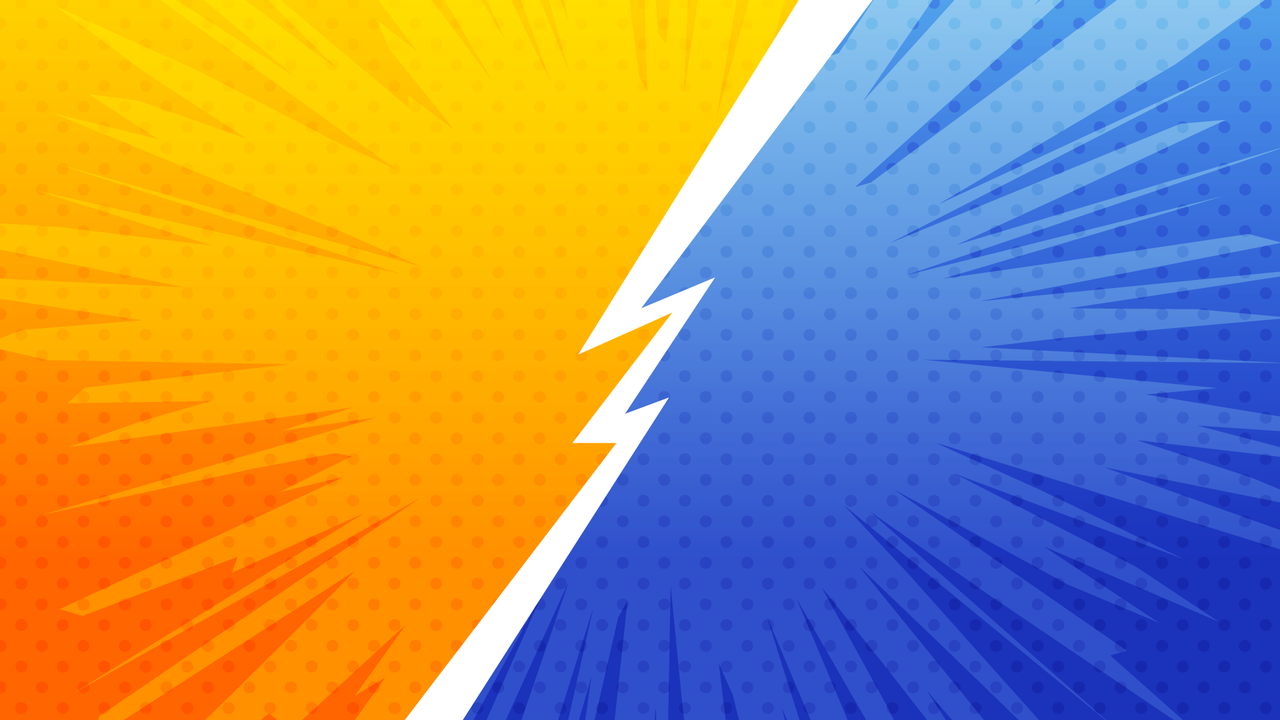

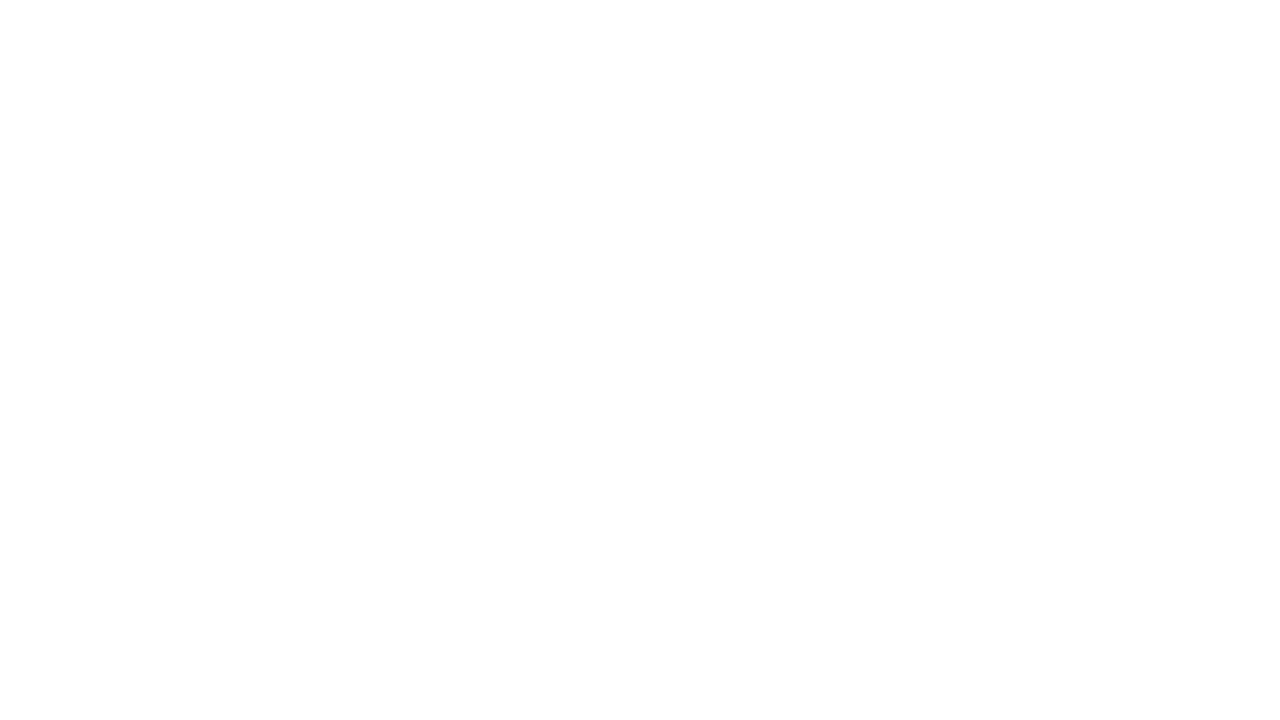

<class 'tuple'> -> resized (576, 576)


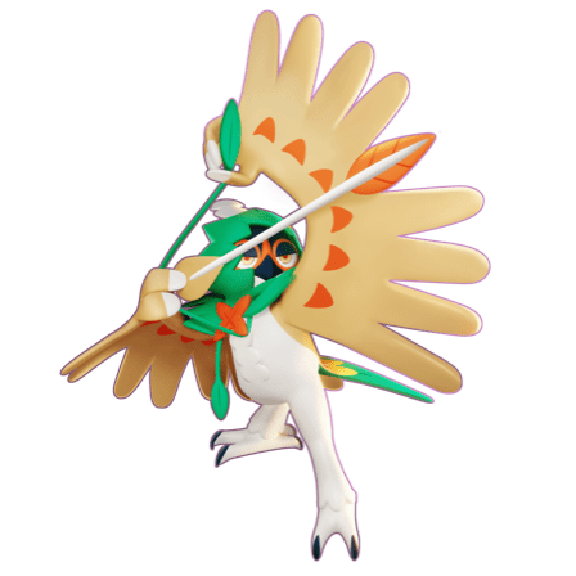

<class 'tuple'> -> resized (254, 139)


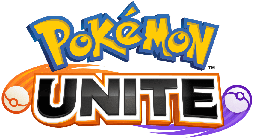

position -> (704 - 0, 144 - 0)
position -> (1026 - 10, 0 - -10)


In [64]:
base_layer = BaseImg(Image.open(random.choice(bgs)))
base_layer.resize_img(shape=[1280, 720])
base_layer.img.show()

clear_layer = BaseImg(
    Image.new("RGBA", base_layer.get_img_size(), (255, 255, 255, 0)))
clear_layer.img.show()

char = SubImg(Image.open(random.choice(chars)))
char.resize_img(base_layer.get_img_size(ratio=0.45)[0])
char.img.show()

logo = SubImg(Image.open(logos[0]))
logo.resize_img(shape=logo.get_img_size(ratio=0.3))
logo.img.show()

clear_layer.img.paste(
    char.img, 
    char.get_paste_position(
        basesize=base_layer.get_img_size(), 
        horizontal="right", vertical="bottom", bottom_pad=0, right_pad=0))

clear_layer.img.paste(
    logo.img, 
    logo.get_paste_position(
        basesize=base_layer.get_img_size(), 
        horizontal="right", vertical="top", bottom_pad=-10, right_pad=10)
)

#clear_layer.img.convert('RGBA')

In [65]:
clear_layer.img.mode

'RGBA'

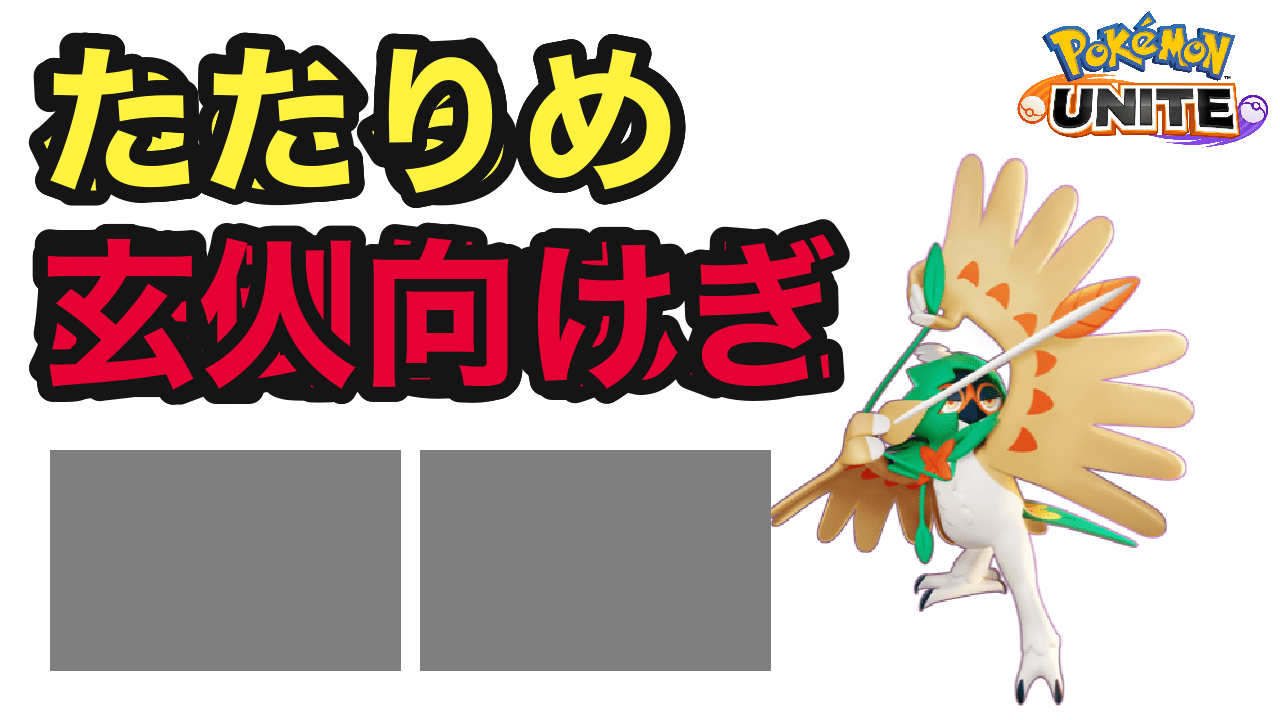

In [70]:
box1 = Draw(
    img=clear_layer.img, 
    xy=[50, 450,400, 670], 
    fill=(0,0,0,128), 
    outline=None, 
    width=1)

box2 = Draw(
    img=clear_layer.img, 
    xy=[420, 450,770, 670], 
    fill=(0,0,0,128) ,
    outline=None, 
    width=1)

box1.draw_rectangle()
box2.draw_rectangle()

tlist=[["みらいよち","たたりめ","ブレイブバード","ねむる"],["つよすぎる","圧倒的すぎ","余裕勝ち","玄人向け","強化された"]]

title1 = Draw(
    img=clear_layer.img, 
    xy=[40,40], 
    text=random.choice(tlist[0]), 
    fill="#FFF33F", 
    font=ImageFont.truetype("{}/material/font/ヒラギノ角ゴシック W7.ttc".format(workdir), 160), 
    anchor=None, 
    spacing=10, 
    align='left', 
    direction=None, 
    features=None,
    language=None, 
    stroke_width=15, 
    stroke_fill="#151515", 
    embedded_color=False,
    width=1)

title2 = Draw(
    img=clear_layer.img, 
    xy=[40,40], 
    text="\n{}".format(random.choice(tlist[1])), 
    fill="#E60033", 
    font=ImageFont.truetype("{}/material/font/ヒラギノ角ゴシック W7.ttc".format(workdir), 160), 
    anchor=None, 
    spacing=20, 
    align='left', 
    direction=None, 
    features=None,
    language=None, 
    stroke_width=15, 
    stroke_fill="#151515", 
    embedded_color=False,
    width=1)

title1.draw_text()
title2.draw_text()

clear_layer.img.show()

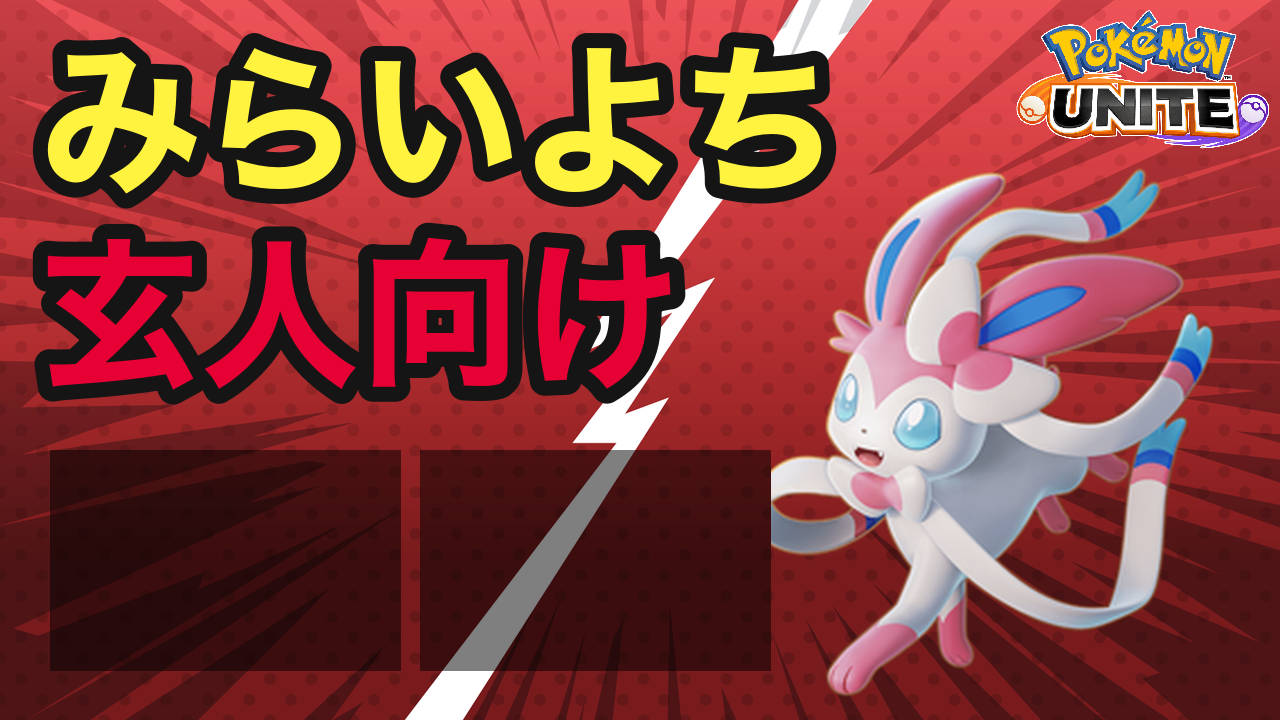

In [16]:
base_layer.composit(target=clear_layer)
base_layer.img.show()

In [108]:
!cp -r ./* ../../mnt/PycharmProjects/thumbnail/

In [104]:
yml['paramSet']['pattern']['title1']

{'xy': [40, 40],
 'text': 'みらいよち',
 'fill': '\\#FFF33F',
 'font': <PIL.ImageFont.FreeTypeFont at 0x7f7f7dd428e0>,
 'anchor': 'None',
 'spacing': 10,
 'align': 'left',
 'direction': 'None',
 'features': 'None',
 'language': 'None',
 'stroke_width': 15,
 'stroke_fill': '\\#151515',
 'embedded_color': False,
 'width': 1}

In [107]:
!cp thumbnail.ipynb thumbnail_conf.ipynb 